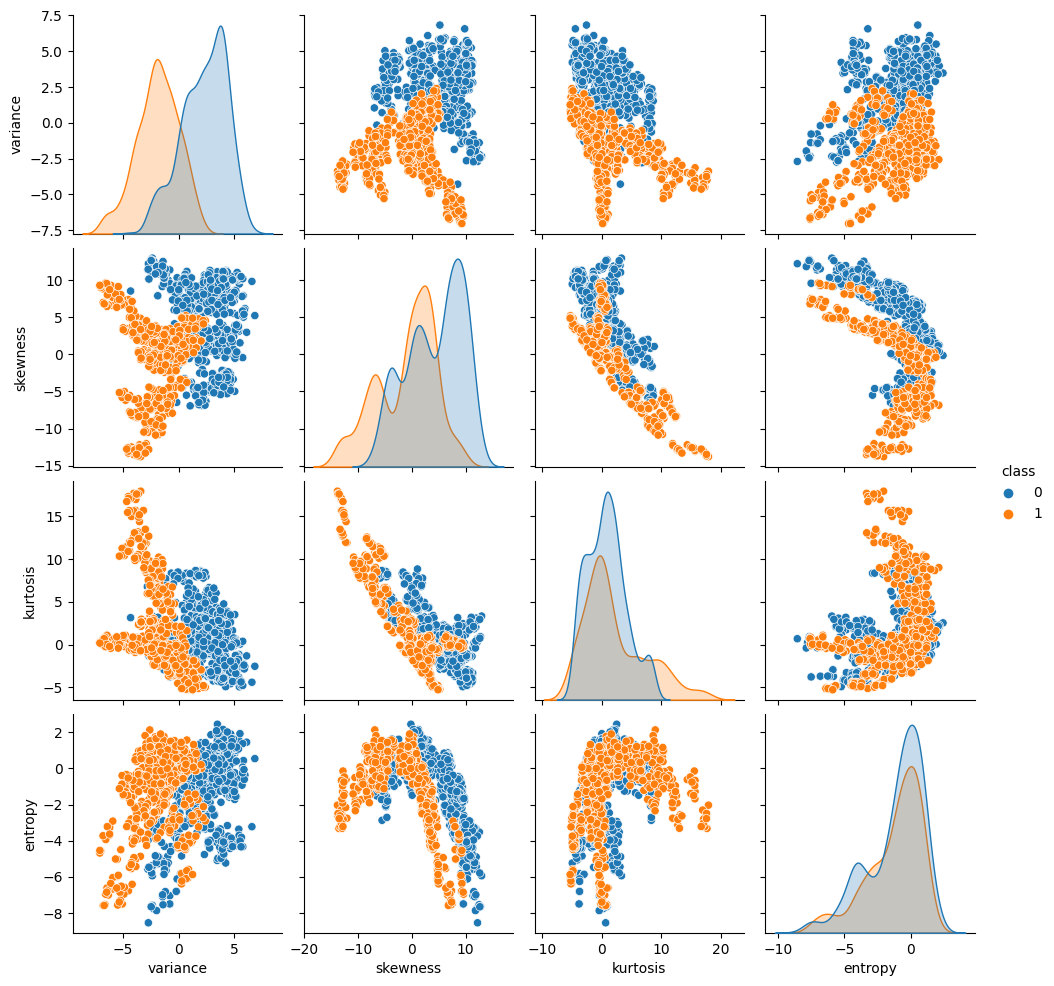

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/banknotes.csv")

# the data classifies notes with 4 input parameters into 2 categories
sns.pairplot(df, hue="class")


In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import tensorflow.keras.backend as K

X = df.drop('class', axis=1).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

K.clear_session()

model = Sequential()
model.add(
    Dense(
        2, input_shape=(4,),
        activation='relu',
        kernel_initializer='ones',
        bias_initializer="ones"
    )
)
model.add(Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer="ones"))
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
weights = model.get_weights()
weights

[array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]